売上予測にモデルにおいて、湿度・気温・天気・価格という4つの説明変数を用いた分析を行います。
天気はカテゴリ型の変数であり、それ以外は連続型の変数です。

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [2]:
# データの読み込み
sales = pd.read_csv("5-3-1-lm-model.csv")
print(sales.head(5))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy
3      39.7    290  195.5         23.0   rainy
4      24.7    290  214.4         14.5   rainy


データ分析の際に行うこととしては、まずはデータを図示します

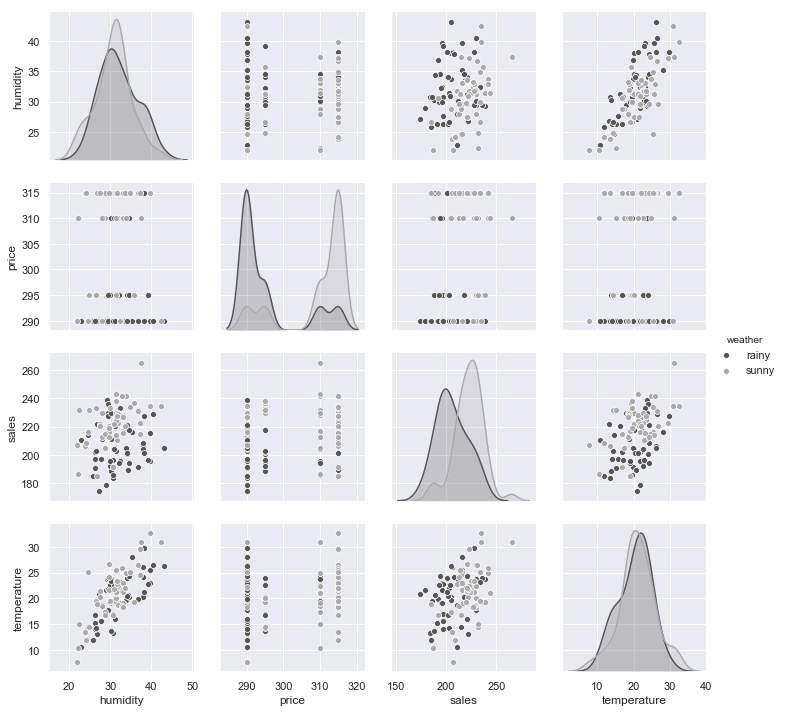

In [3]:
sns.pairplot(data = sales, hue = "weather",palette = "gray")

In [4]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


上記のコードを見ると、売り上げは雨の時に低くなっています。さらにpriceも低くなっています。
単にpriceとsalesの間だけを見ると、間違った結論に導かれそうです。

では、天気が同じだった時の商品価格が売り上げにもたらす影響はどうでしょう

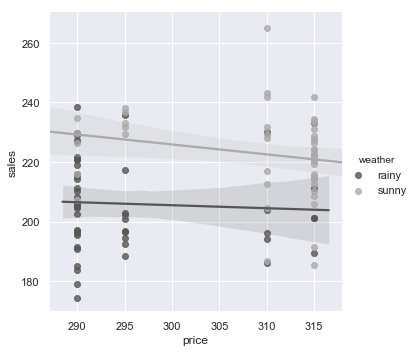

In [5]:
sns.lmplot(x = "price", y="sales",data=sales,hue="weather",palette = 'gray')

説明変数が4つ入ったモデルを推定します。
説明変数同士を「+」で連結することで、複数の説明変数をモデルに組み込むことができます

In [6]:
# 複数の説明変数を持つモデルを推定する
lm_sales = smf.ols(
"sales ~ weather + humidity + temperature + price",
data = sales).fit()

# 推定された結果
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

このモデルを確かめるのにt検定を行います。
t検定は同じ対象をある期間を界に差が優位かどうかを確かめる検定でした

In [7]:
lm_sales.summery().tables[1]

AttributeError: 'OLSResults' object has no attribute 'summery'

In [8]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021
